<a href="https://colab.research.google.com/github/narendra974/AIMLOPS_IISC/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical AI and MLOps : Assignment 2



### Download the datasets.

The datasets are downloaded and stored in pandas dataframes `df1` and `df2`. You are free to change the names as you like. You can split the datasets using `train_test_split` function from the `scikit-learn` library.

**1st dataset:** (df1) For problems 1, 2, 3 and 4

**2nd dataset:** (df2) For problem 5

In [2]:
# DO NOT EDIT

!pip install gdown
!gdown 18NuvJotUFiTAHW0YgaoLVu2blW_V6YX0
!unzip -o /content/assignment2.zip -d data

import pandas as pd

df1 = pd.read_csv('/content/data/assignment2-1.csv')
df2 = pd.read_csv('/content/data/assignment2-2.csv')

Downloading...
From: https://drive.google.com/uc?id=18NuvJotUFiTAHW0YgaoLVu2blW_V6YX0
To: /content/assignment2.zip
100% 120M/120M [00:01<00:00, 100MB/s]
Archive:  /content/assignment2.zip
  inflating: data/assignment2-1.csv  
  inflating: data/assignment2-2.csv  


## Problem and Dataset Description

You have been provided with a dataset containing various attributes about the behavior of an online shopper and whether they made a purchase or not. Your task is to build a decision tree model to predict whether a visitor to the webpage actually made a purchase or not based on the provided attributes.

Dataset columns:

*   Electronic_Devices : the number of pages of electronic devices visited by the shopper in a session
*   Electronic_Devices_Duration : the total time spent in electronic devices category by the shopper
*   Groceries : the number of pages of groceries visited by the shopper
*   Groceries_Duration : the total time spent in groceries category by the shopper
*   Sports_Equipments : the number of pages of sports equipments visited by the shopper
*   Sports_Equipments_Duration : the total time spent in sports equipments category by the shopper
*   Bounce_Rates : this feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests
*   Special_Day : this feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Independence Day)
*   Month : the specific month of the year
*   Browser : the browser used by the shopper
*   Region : the region where the searches were made
*   Type_of_visitor : this feature indicates whether the shopper is a returning or new visitor to the page
*   Weekend : Boolean value indicating whether the date of the visit is weekend
*   Purchase_made : Boolean value indicating whether the purchase was made or not

## Problem 1: Decision Tree (2 Marks)


1.   Using the provided dataset, build a decision tree model that can predict whether a visitor will make a purchase during their online session. Additionally, evaluate the performance of your decision tree model using appropriate metrics such as accuracy, precision, recall, and F1-score.
2.   Which attribute(s) did your decision tree identify as the most important for predicting whether a visitor will make a purchase or not?
3.   What is the maximum depth of your decision tree and how did you estimate it?
4.   What is the accuracy of your decision tree model in predicting purchase behavior, and did you employ any techniques to handle categorical features or missing values in the dataset?





In [3]:
### Write your code and answers here
df1.head()

,ElectronicDevices,ElectronicDevices_Duration,Groceries,Groceries_Duration,SportsRelated,Sports_Equipments_Duration,Bounce_Rates,Special_Day,Month,Browser,Region,Type_of_visitor,Weekend,Purchase_made
0,0,0.0,0,0.0,1,0.000000,0.20,0.0,May,Mozilla,1,Old_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.0,May,Edge,1,Old_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.0,May,Mozilla,9,Old_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.0,May,Edge,2,Old_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.0,May,Opera,1,Old_Visitor,True,False


In [4]:
df1.info()
# no misssing values are found.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2004 entries, 0 to 2003
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ElectronicDevices           2004 non-null   int64  
 1   ElectronicDevices_Duration  2004 non-null   float64
 2   Groceries                   2004 non-null   int64  
 3   Groceries_Duration          2004 non-null   float64
 4   SportsRelated               2004 non-null   int64  
 5   Sports_Equipments_Duration  2004 non-null   float64
 6   Bounce_Rates                2004 non-null   float64
 7   Special_Day                 2004 non-null   float64
 8   Month                       2004 non-null   object 
 9   Browser                     2004 non-null   object 
 10  Region                      2004 non-null   int64  
 11  Type_of_visitor             2004 non-null   object 
 12  Weekend                     2004 non-null   bool   
 13  Purchase_made               2004 

In [5]:
df1.count()

ElectronicDevices             2004
ElectronicDevices_Duration    2004
Groceries                     2004
Groceries_Duration            2004
SportsRelated                 2004
Sports_Equipments_Duration    2004
Bounce_Rates                  2004
Special_Day                   2004
Month                         2004
Browser                       2004
Region                        2004
Type_of_visitor               2004
Weekend                       2004
Purchase_made                 2004
dtype: int64

In [6]:
## no null or missing values found.
df1.isnull().sum()

ElectronicDevices             0
ElectronicDevices_Duration    0
Groceries                     0
Groceries_Duration            0
SportsRelated                 0
Sports_Equipments_Duration    0
Bounce_Rates                  0
Special_Day                   0
Month                         0
Browser                       0
Region                        0
Type_of_visitor               0
Weekend                       0
Purchase_made                 0
dtype: int64

In [7]:
# printing data types
print(df1.dtypes)

ElectronicDevices               int64
ElectronicDevices_Duration    float64
Groceries                       int64
Groceries_Duration            float64
SportsRelated                   int64
Sports_Equipments_Duration    float64
Bounce_Rates                  float64
Special_Day                   float64
Month                          object
Browser                        object
Region                          int64
Type_of_visitor                object
Weekend                          bool
Purchase_made                    bool
dtype: object


In [8]:
# no missing null values found.
df1.notnull().sum()

ElectronicDevices             2004
ElectronicDevices_Duration    2004
Groceries                     2004
Groceries_Duration            2004
SportsRelated                 2004
Sports_Equipments_Duration    2004
Bounce_Rates                  2004
Special_Day                   2004
Month                         2004
Browser                       2004
Region                        2004
Type_of_visitor               2004
Weekend                       2004
Purchase_made                 2004
dtype: int64

In [9]:
# Checking basic details of the data
df1.describe(include= 'all')

,ElectronicDevices,ElectronicDevices_Duration,Groceries,Groceries_Duration,SportsRelated,Sports_Equipments_Duration,Bounce_Rates,Special_Day,Month,Browser,Region,Type_of_visitor,Weekend,Purchase_made
count,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004,2004,2004.000000,2004,2004,2004
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,10,NaN,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mar,Edge,NaN,Old_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1820,1245,NaN,1779,1514,1824
mean,1.751497,66.499439,0.379741,27.354991,18.888723,778.563731,0.024014,0.021457,NaN,NaN,2.992515,NaN,NaN,NaN
std,2.769047,169.448040,1.154993,114.582470,22.576195,1099.510902,0.054974,0.116183,NaN,NaN,2.338641,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,5.000000,118.625000,0.000000,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN
50%,0.000000,0.000000,0.000000,0.000000,12.000000,413.400000,0.000000,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN
75%,3.000000,63.000000,0.000000,0.000000,25.000000,1039.129167,0.014286,0.000000,NaN,NaN,4.000000,NaN,NaN,NaN


In [10]:
## Converting all not integer/float columns to category variables.
cols = ['Month', 'Browser', 'Weekend', 'Purchase_made', 'Type_of_visitor']
df1[cols] = df1[cols].astype('category')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2004 entries, 0 to 2003
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ElectronicDevices           2004 non-null   int64   
 1   ElectronicDevices_Duration  2004 non-null   float64 
 2   Groceries                   2004 non-null   int64   
 3   Groceries_Duration          2004 non-null   float64 
 4   SportsRelated               2004 non-null   int64   
 5   Sports_Equipments_Duration  2004 non-null   float64 
 6   Bounce_Rates                2004 non-null   float64 
 7   Special_Day                 2004 non-null   float64 
 8   Month                       2004 non-null   category
 9   Browser                     2004 non-null   category
 10  Region                      2004 non-null   int64   
 11  Type_of_visitor             2004 non-null   category
 12  Weekend                     2004 non-null   category
 13  Purchase_made     

In [11]:
from sklearn.model_selection import train_test_split

X = df1.drop(columns= ['Purchase_made'])  # Seperating the target and the rest
y = df1['Purchase_made']

<Axes: xlabel='Purchase_made', ylabel='count'>

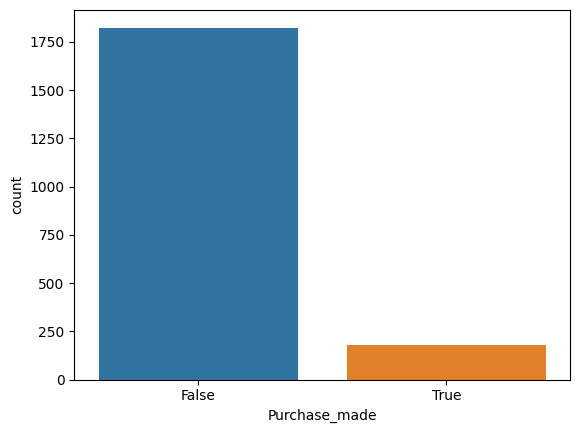

In [12]:
import seaborn as sns

sns.countplot(x=df1["Purchase_made"])

In [15]:
from sklearn.preprocessing import LabelEncoder

X_cat_cols = pd.DataFrame(X, columns=cols)
label_encoder = LabelEncoder()
X['Month'] = label_encoder.fit_transform(X['Month'])
X['Browser'] = label_encoder.fit_transform(X['Browser'])
X['Weekend'] = label_encoder.fit_transform(X['Weekend'])
X['Type_of_visitor'] = label_encoder.fit_transform(X['Type_of_visitor'])
y = label_encoder.fit_transform(y)

In [16]:
## here we see the very less samples of '1', so we shall apply smote in the pipeline.
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X, y = sm.fit_resample(X, y.ravel())
print("After UpSampling, counts of label '1': {}".format(sum(y==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y==0)))

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

After UpSampling, counts of label '1': 1824
After UpSampling, counts of label '0': 1824 



In [17]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [18]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score

y_predict = tree_clf.predict(x_test)
print(classification_report(y_test, y_predict))
print(f' Accuracy Score {accuracy_score(y_test, y_predict)}')
print(f' Precision Score {precision_score(y_test, y_predict)}')
print(f' Recall Score {recall_score(y_test, y_predict)}')
print(f' F1 Score {f1_score(y_test, y_predict)}')
print(f' ROC Score {roc_auc_score(y_test, y_predict)}')

              precision    recall  f1-score   support

           0       0.84      0.74      0.78       438
           1       0.78      0.87      0.82       474

    accuracy                           0.80       912
   macro avg       0.81      0.80      0.80       912
weighted avg       0.81      0.80      0.80       912

 Accuracy Score 0.8037280701754386
 Precision Score 0.7798861480075902
 Recall Score 0.8670886075949367
 F1 Score 0.8211788211788211
 ROC Score 0.8011242124732674


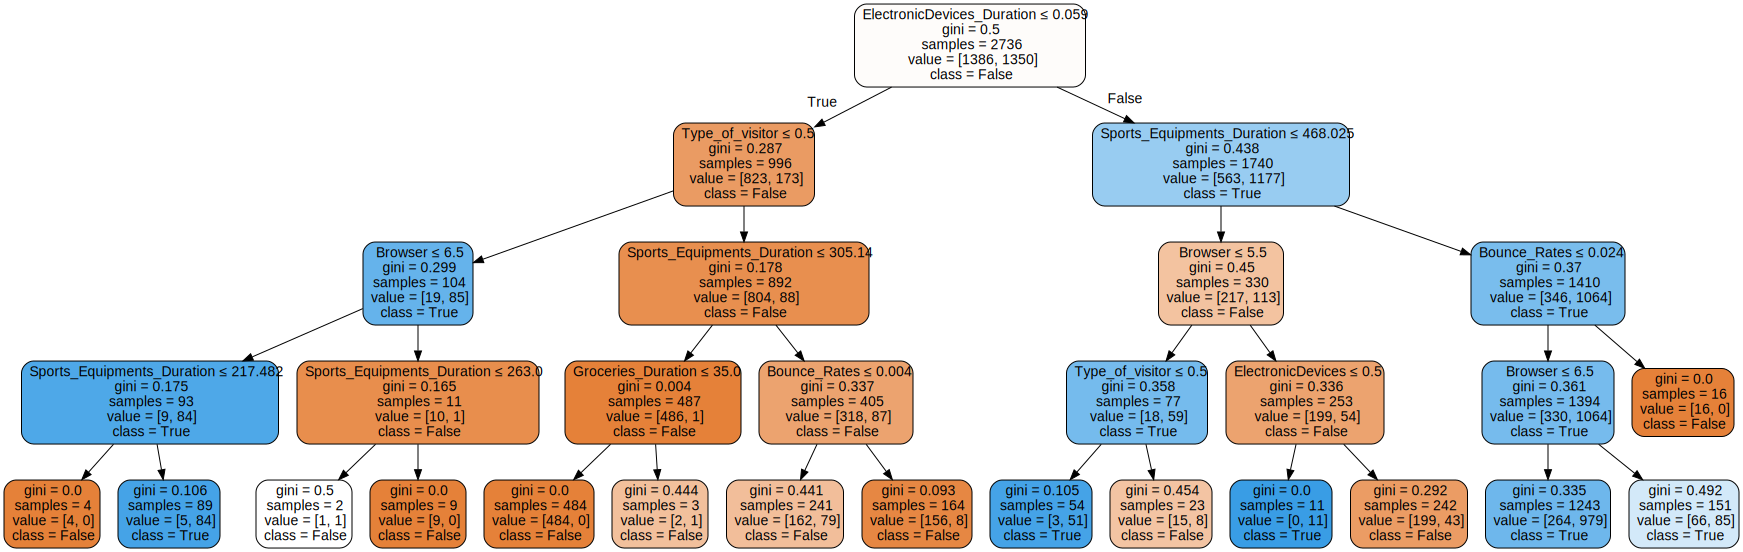

In [19]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(tree_clf, out_file=None,  feature_names=X.columns,
                      class_names=['False', 'True'],
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [20]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

feat_dict= {}
for col, val in sorted(zip(X.columns, tree_clf.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val

feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})
feat_df.head()

,Feature,Importance
0,ElectronicDevices_Duration,0.486927
1,Sports_Equipments_Duration,0.180240
2,Type_of_visitor,0.163767
3,Browser,0.095283
4,Bounce_Rates,0.051136


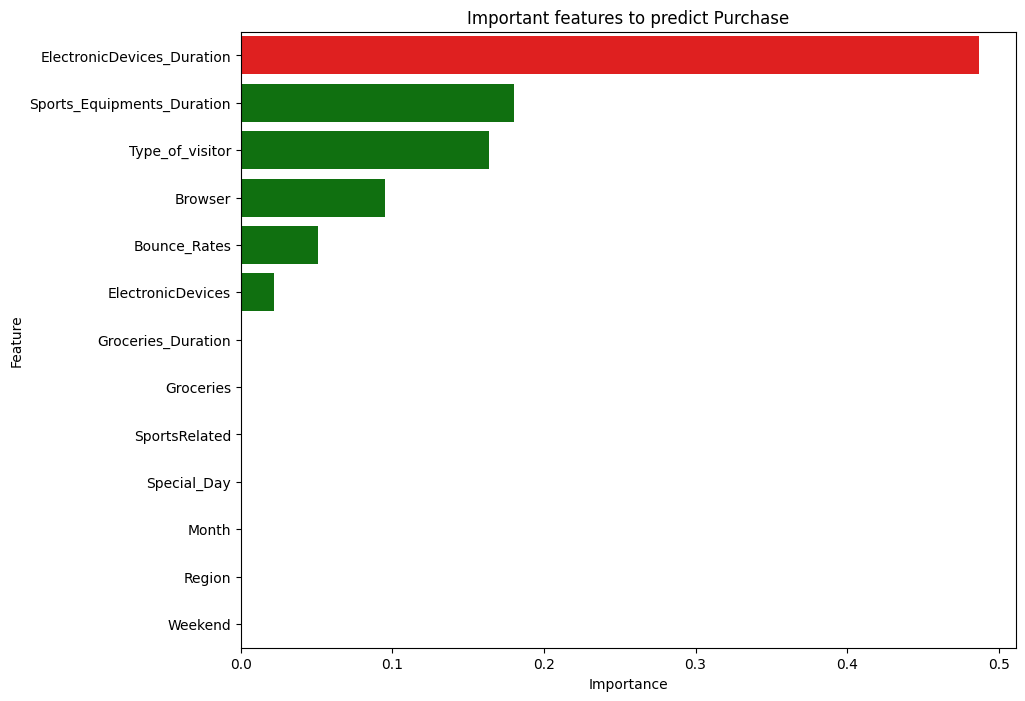

In [21]:
values = feat_df.Importance
idx = feat_df.Feature
plt.figure(figsize=(10,8))
clrs = ['green' if (x < max(values)) else 'red' for x in values ]
sns.barplot(y=idx,x=values,palette=clrs).set(title='Important features to predict Purchase')
plt.show()

## Problem 2: Random Forest (1 mark)


1.   Implement a Random Forest classifier with a specified number of trees (e.g., 100 trees).Train the Random Forest classifier on the training data.
2.   Evaluate the model's performance using appropriate metrics (e.g., accuracy, precision, recall, F1-score) on the testing data.

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score

clf_rf = RandomForestClassifier(n_estimators=100)
clf_rf.fit(x_train, y_train)
y_predict = clf_rf.predict(x_test)
print(classification_report(y_test, y_predict))
print(f' Accuracy Score {accuracy_score(y_test, y_predict)}')
print(f' Precision Score {precision_score(y_test, y_predict)}')
print(f' Recall Score {recall_score(y_test, y_predict)}')
print(f' F1 Score {f1_score(y_test, y_predict)}')
print(f' ROC Score {roc_auc_score(y_test, y_predict)}')

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       438
           1       0.88      0.96      0.91       474

    accuracy                           0.91       912
   macro avg       0.91      0.90      0.91       912
weighted avg       0.91      0.91      0.91       912

 Accuracy Score 0.9067982456140351
 Precision Score 0.8762088974854932
 Recall Score 0.9556962025316456
 F1 Score 0.9142280524722503
 ROC Score 0.9047887405352292


## Problem 3: Bagging with Pruning (1 mark)



1.   Define the mathematical criterion for pruning a decision tree within the Bagging with Pruning ensemble. Explain how this criterion helps prevent overfitting.
2.   When applying bagging with pruning to decision trees in the dataset, how do you decide when to prune a branch or subtree in each individual tree, and how does this ensemble approach help reduce overfitting compared to a single decision tree?



In [32]:
### Write your code and answers here












## Problem 4: Boosting and XG Boost (1 mark)



1.   Implement an AdaBoost classifier witha specified number of weak learners. You can use Skikit-learn's AdaBoost classifier. Train the AdaBoost classifier on the training data. Evaluate the model's performance using appropriate classification metrics (e.g., accuracy, precision, recall, F1-score) on the testing data.
2.   Visualize the decision boundaries of the AdaBoost model by selecting two features from the dataset and creating a 2D plot that shows how the model separates the classes.





In [23]:
### Write your code and answers here

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score

clf_adaboost = AdaBoostClassifier(n_estimators=50)
clf_adaboost.fit(x_train, y_train)
y_predict = clf_adaboost.predict(x_test)

print(classification_report(y_test, y_predict))
print(f' Accuracy Score {accuracy_score(y_test, y_predict)}')
print(f' Precision Score {precision_score(y_test, y_predict)}')
print(f' Recall Score {recall_score(y_test, y_predict)}')
print(f' F1 Score {f1_score(y_test, y_predict)}')
print(f' ROC Score {roc_auc_score(y_test, y_predict)}')

              precision    recall  f1-score   support

           0       0.85      0.73      0.79       438
           1       0.78      0.88      0.83       474

    accuracy                           0.81       912
   macro avg       0.82      0.81      0.81       912
weighted avg       0.82      0.81      0.81       912

 Accuracy Score 0.8114035087719298
 Precision Score 0.7817164179104478
 Recall Score 0.8839662447257384
 F1 Score 0.8297029702970297
 ROC Score 0.8084214785272528


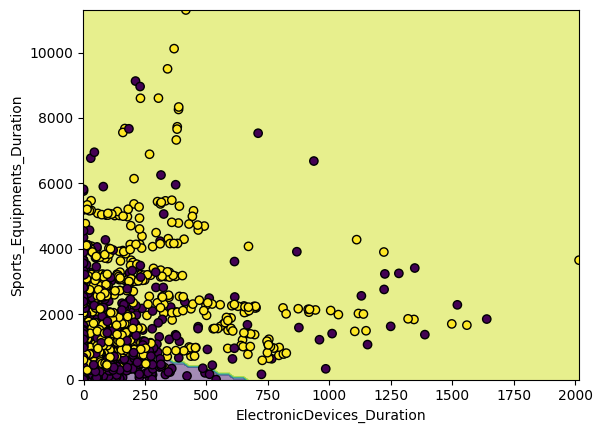

In [31]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

cols_2 = ['ElectronicDevices_Duration', 'Sports_Equipments_Duration']
X_new = pd.DataFrame(x_train, columns=cols_2)

classifier = LogisticRegression().fit(X_new, y_train)
disp = DecisionBoundaryDisplay.from_estimator(classifier, X_new, response_method="predict",
     xlabel='ElectronicDevices_Duration', ylabel='Sports_Equipments_Duration', alpha=0.5,)
disp.ax_.scatter(X_new.iloc[:, 0], X_new.iloc[:, 1], c=y_train, edgecolor="k")
plt.show()
# clf_adaboost_2 = AdaBoostClassifier(n_estimators=50)
# clf_adaboost_2.fit(X_new, y_train)
# plot_decision_boundary(clf_adaboost_2, X_new, y_train)

In [33]:
df2.head()

,x,y,z
0,-5.958191,0.688065,8.135345
1,-5.952240,0.670212,8.136536
2,-5.995087,0.653549,8.204376
3,-5.942718,0.676163,8.128204
4,-5.991516,0.641647,8.135345


# Problem 5: Unsupervised Learning (5 marks)

You are given a dataset, which contains sensor data. Your task is to apply dimensionality reduction and clustering techniques on this dataset using Principal Component Analysis (PCA), K-means, and Linear Discriminant Analysis (LDA).

## Part 1: PCA (1 mark)
**a.** Apply PCA to reduce the dimensionality of the dataset.

**b.** Calculate the percentage of variance explained by each principal component.

**c.** Plot a scree plot to visualize the percentage of variance explained by each principal component.

**d.** Discuss the importance of dimensionality reduction using PCA in the context of the HAR dataset.

## Part 2: K-means (2 marks)
**a.** Apply K-means clustering on the reduced-dimensional dataset obtained from PCA.

**b.** Use the elbow method to determine the optimal number of clusters.

**c.** Visualize and interpret the results of the K-means clustering.

**d.** Evaluate the quality of the clustering solution using appropriate metrics such as silhouette score or within-cluster sum of squares.

## Part 3: LDA (2 marks)
**a.** Apply LDA to project the dataset onto a lower-dimensional space that maximizes class separability.

**b.** Perform K-means clustering on the reduced-dimensional dataset obtained from LDA.

**c.** Compare the clustering results obtained from LDA with the results obtained from PCA and discuss the differences.

**d.** Evaluate the effectiveness of LDA in improving the clustering performance compared to PCA.

**Note:** You can use any libraries of your choice to implement PCA, K-means, and LDA on the UCI HAR Dataset. Provide code snippets, visualizations, and detailed explanations to support your answers. Consider discussing the interpretability of the reduced-dimensional space, the impact of different clustering parameters, and any challenges encountered during the analysis.

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13062475 entries, 0 to 13062474
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   x       float64
 1   y       float64
 2   z       float64
dtypes: float64(3)
memory usage: 299.0 MB


In [35]:
df2.count()

x    13062475
y    13062475
z    13062475
dtype: int64

In [36]:
# printing data types
print(df2.dtypes)

x    float64
y    float64
z    float64
dtype: object


In [37]:
df2.isnull().sum()

x    0
y    0
z    0
dtype: int64

In [38]:
# no missing null values found.
df2.notnull().sum()

x    13062475
y    13062475
z    13062475
dtype: int64

In [39]:
# Checking basic details of the data
df2.describe(include= 'all')

,x,y,z
count,1.306248e+07,1.306248e+07,1.306248e+07
mean,-1.704579e+00,1.595409e-01,8.931753e+00
std,3.859088e+00,1.552040e+00,2.262952e+00
min,-3.881207e+01,-2.249512e+01,-1.342387e+01
25%,-4.012682e+00,-6.961212e-01,7.738060e+00
50%,-2.145178e+00,1.532270e-01,9.063251e+00
75%,-1.532270e-01,1.037979e+00,9.921814e+00
max,2.792894e+01,2.080815e+01,3.931801e+01


In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(df2)
print(pca.components_)
print(pca.explained_variance_ratio_)

[[-0.99340256  0.02136315  0.11267195]
 [ 0.11202329 -0.02945775  0.99326886]
 [-0.02453841 -0.99933771 -0.02687023]]
[0.67013701 0.22279061 0.10707238]


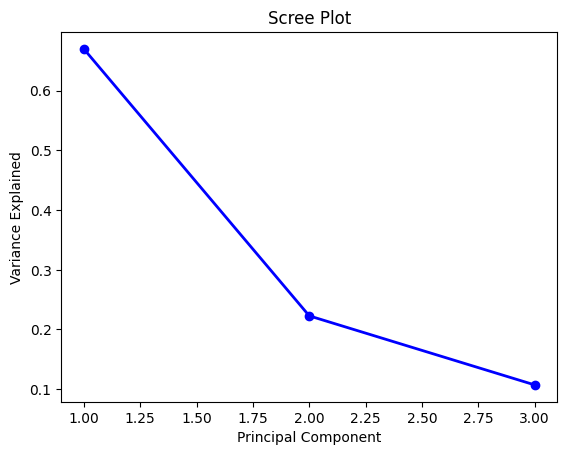

In [49]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

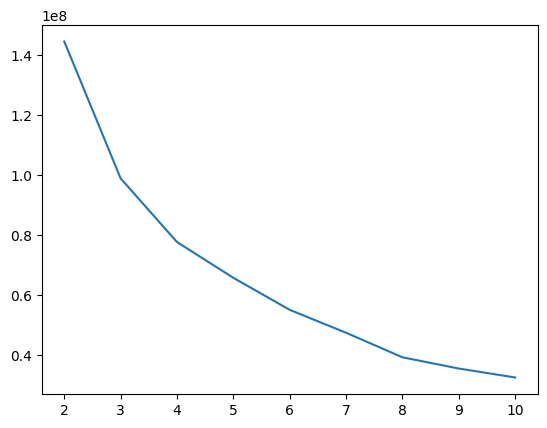

In [52]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pca = PCA(n_components=2)
df2_pca = pca.fit_transform(df2)

wcss_sc = []

for i in range(2, 11):
    clustering_sc = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering_sc.fit(df2_pca)
    wcss_sc.append(clustering_sc.inertia_)

ks = [2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss_sc);

In [ ]:
## selecting best clusters as 4 ...can see the elbow method
from sklearn.metrics import silhouette_score

km_clustering = KMeans(n_clusters=4, init='k-means++', random_state=42)
km_clustering.fit(df2_pca)
sh_score = silhouette_score(df2_pca, km_clustering.labels_)
print(sh_score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
## LDA is a classification algorithm but during the training it learns most discriminative axes
## between the classes and these axes can be used to define an hyperplance onto which to projecct
## the data.
## benefit of this approach is that it will keep the classes as far as part as possible.
## so LDA is good technique to reduce dimensionality before running any classification algorithm.

In [55]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
df2_lda = lda.fit_transform(df2)

wcss_sc_lda = []

for i in range(2, 11):
    clustering_sc = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering_sc.fit(df2_lda)
    wcss_sc_lda.append(clustering_sc.inertia_)

ks = [2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss_sc);

TypeError: ignored